<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
N=1000
X = np.random.random((N,2))*6 -3  #uniformly distributed between (-3,+3)
Y = np.cos(2*X[:,0]) + np.cos(3 * X[:,1])

This implements the function: $y = cos(2x_1) + cos(3x_2)$

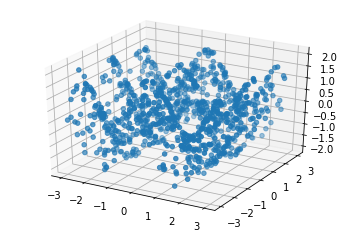

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)


In [0]:
#build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation = 'relu'),
    tf.keras.layers.Dense(1)                                
])

In [19]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer = opt, loss = 'mse')
r = model.fit(X,Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 248us/sample - loss: 0.9403
Epoch 2/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.8907
Epoch 3/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.8938
Epoch 4/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.8480
Epoch 5/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.8258
Epoch 6/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.7613
Epoch 7/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.6985
Epoch 8/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.6931
Epoch 9/100
1000/1000 [==============================] - 0s 58us/sample - loss: 0.6469
Epoch 10/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.5753
Epoch 11/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.5888
Epoch 12/100
1000/

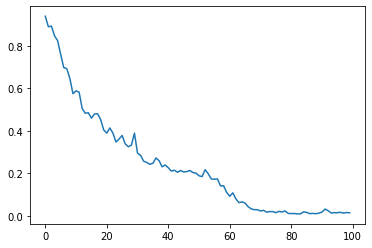

In [20]:
plt.plot(r.history['loss'], label='loss')

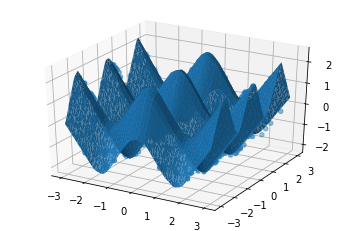

In [21]:
# Plot the prediction surface
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

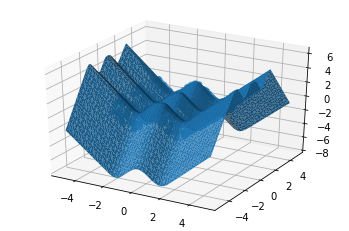

In [23]:
#Can it extrapolate&
#Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

#it does not quite work